<a href="https://colab.research.google.com/github/JanMarcelKezmann/Fast-Fourier-Transformation-with-Python-and-Numpy/blob/master/Fast_Fourier_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy Fast Fourier Transformation Implentation

<p>In this short tutorial I am going to implement a Fast Fourier Transformation by using the Library <strong>Numpy</strong>.</p>
<p>It is going to start of with a implementation of the FFT as well as the iFFT (inverse FFT) for arrays and will continue with the implementation of the FFT (and iFFT) for matrices.</p>


## Load the Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist

### Load the Data

<p>For this code example the mnist dataset for Machine Learning will be used to calculate the FFT2D as well as the iFFT2D of a single digit.</p>

In [0]:
(X_train, _), (_, _) = mnist.load_data()

<p>Initialize function for image showing</p>

In [0]:
def show_img(img, size=28):
    img = img.reshape(size, size)
    plt.imshow(img, cmap="gray")
    plt.show()

<p>Let's start by defining an random array and by transforming it via the np.fft.fft function of the Numpy library. The FFT which we get from numpy serves as a comparison for the later on self-calculated FFT.</p>

In [90]:
# define a random array to transform over
array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

np_fft_array = np.fft.fft(array)
print(np_fft_array)

[136. +0.j          -8.+40.21871594j  -8.+19.3137085j   -8.+11.9728461j
  -8. +8.j          -8. +5.3454291j   -8. +3.3137085j   -8. +1.59129894j
  -8. +0.j          -8. -1.59129894j  -8. -3.3137085j   -8. -5.3454291j
  -8. -8.j          -8.-11.9728461j   -8.-19.3137085j   -8.-40.21871594j]


<p>Now it is time to implent the FFT by hand.</p>

## FFT
### The Cooley-Tukey Algorithm

<p>To implement the FFT the Cooley-Tukey algorithm will be used. Next to this only some minor changes are made which does not effect the algorithms performance, it only saves memory.</p>

In [0]:
# define a function that bit reverse the input
# per definition of the cooley-tukey algorithm this is necessary to get the
# calculations in the fft into the correct order
def bitrevorder(x):
    len_max_bin = int(np.log2(len(x)))
    if len_max_bin < 10:
        helper = "{0:0" + str(len_max_bin) + "b}"
    else:
        helper = "{0:" + str(len_max_bin) + "b}"
    # binarize array
    str_x_bin = [helper.format(i) for i in range(len(x))]
    # reverse each string in array
    rev_str_x_bin = [i[::-1] for i in str_x_bin]
    # get reversed indices of array
    x_bro_ind = [int(i, 2) for i in rev_str_x_bin]
    # get reversed numbers of array
    x_bro = [x[i] for i in x_bro_ind]
    return x_bro

# FFT implentation

############################################################################################
    # Input:
    #     a:              Input array which will be transformed
    #     print_info:     Boolean. If set to True all calculation steps will be printed out
    #     out_round_acc:  Integer. Define rounding accuracy
    # Output:
    #     rev_a:          FFT of the input array, same dimension as input array
############################################################################################

def fft(a, print_info=False, out_round_acc=6):
    # bitreverse the input array to bring calculations in the for loops into the correct order
    rev_a = bitrevorder(a)

    n = int(np.log2(len(a)))

    # Calculate the number of steps taken to compare it to the wanted running time of O(N * log(N))
    # with N = len(a)
    number_of_operations = 0
    
    for m  in range(1, n + 1):
        if print_info:
            print("m : " + str(m))
        for j in range(0, 2**(m - 1)):
            e = round(np.exp(-2 * np.pi * complex(0, 1) * j / (2**m)), 8)
            if print_info:
                print("j : " + str(j))
            for r in range(0, (2**n), (2**m)):
                v = rev_a[r + j + 2**(m - 1)] * e

                rev_a[r + j + 2**(m - 1)] = rev_a[r + j] - v
                rev_a[r + j] = rev_a[r + j] + v

                if print_info:
                    print("r : " + str(r))
                    print("Calculation of: beta[" + str(r + j) + "]")
                    print("BCalculation of: beta[" + str(r + j + 2**(m - 1)) + "]")

                # adapt the number of calculations
                number_of_operations += 2

    print("\nN = " + str(len(a)) + " and Number of operations: (N * log_2(N)) = " + str(number_of_operations) + "\n")        
    rev_a = [round(i, out_round_acc) for i in rev_a]
    return rev_a

In [92]:
fft_array = fft(array, print_info=False)


N = 16 and Number of operations: (N * log_2(N)) = 64



<p>Now we can test if the self implemented version of the cooley-tukey algorithm is getting us the same result as the correct numpy comparison.</p>

In [93]:
# check if implementation is close to the numpy solution
print(np.isclose(np_fft_array, fft_array, rtol=1e-05, atol=1e-08))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


<p>So, we know now that the algorithm is working fine.</p>
<p>This means we can implement the inverse FFT now, which is if you ones have the FFT very trivial. It is only necessary to change the variable <strong>e</strong> and to remember that the result will contain only an array of real numbers and not complext ones.</p>

In [0]:
# inverse FFT
############################################################################################
    # Input:
    #     a:              Input array which will be retransformed
    #     print_info:     Boolean. If set to True all calculation steps will be printed out
    #     out_round_acc:  Integer. Define rounding accuracy
    # Output:
    #     rev_a:          iFFT of the input array, same dimension as input array
############################################################################################

def ifft(a, print_info=False, out_round_acc=6):
    # bitreverse the input array to bring calculations in the for loops into the correct order
    rev_a = bitrevorder(a)

    n = int(np.log2(len(a)))

    # Calculate the number of steps taken to compare it to the wanted running time of O(N * log(N))
    # with N = len(a)
    number_of_operations = 0
    
    for m  in range(1, n + 1):
        if print_info:
            print("m : " + str(m))
        for j in range(0, 2**(m - 1)):
            e = round(np.exp(2 * np.pi * complex(0, 1) * j / (2**m)), 8)
            if print_info:
                print("j : " + str(j))
            for r in range(0, (2**n), (2**m)):
                v = rev_a[r + j + 2**(m - 1)] * e

                rev_a[r + j + 2**(m - 1)] = rev_a[r + j] - v
                rev_a[r + j] = rev_a[r + j] + v

                if print_info:
                    print("r : " + str(r))
                    print("Calculation of: beta[" + str(r + j) + "]")
                    print("Calculation of: beta[" + str(r + j + 2**(m - 1)) + "]")

                # adapt the number of calculations
                number_of_operations += 2

    print("\nN = " + str(len(a)) + " and Number of operations: (N * log_2(N)) = " + str(number_of_operations) + "\n")        
    # transform complex array to real array
    rev_a = np.round(np.asarray([round(i.real, out_round_acc) for i in rev_a]) / len(a), out_round_acc)

    return rev_a

In [95]:
ifft_array = ifft(fft_array, print_info=False)
print(ifft_array)


N = 16 and Number of operations: (N * log_2(N)) = 64

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


<p>Since the array is the same as the original input into the FFT function, we know that the inverse FFT is working properly.</p>

# FFT2D

<p>Again first of all define a random matrix and perform the np.fft.fft2() numpy FFT2D on it and save it for later comparison.</p>

In [96]:
matrix = np.array([[1, 2, 3, 4, 5, 6, 7, 8],
                   [9, 10, 11, 12, 13, 14, 15, 16],
                   [17, 18, 19, 20, 21, 22, 23, 24],
                   [25, 26, 27, 28, 29, 30, 31, 32],
                   [33, 34, 35, 36, 37, 38, 39, 40],
                   [41, 42, 43, 44, 45, 46, 47, 48],
                   [49, 50, 51, 52, 53, 54, 55, 56],
                   [57, 58, 59, 60, 61, 62, 63, 64]])

np_fft2d_matrix = np.fft.fft2(matrix)
print(np_fft2d_matrix)

[[2080.  +0.j          -32. +77.254834j    -32. +32.j
   -32. +13.254834j    -32.  +0.j          -32. -13.254834j
   -32. -32.j          -32. -77.254834j  ]
 [-256.+618.03867197j    0.  +0.j            0.  +0.j
     0.  +0.j            0.  +0.j            0.  +0.j
     0.  +0.j            0.  +0.j        ]
 [-256.+256.j            0.  +0.j            0.  +0.j
     0.  +0.j            0.  +0.j            0.  +0.j
     0.  +0.j            0.  +0.j        ]
 [-256.+106.03867197j    0.  +0.j            0.  +0.j
     0.  +0.j            0.  +0.j            0.  +0.j
     0.  +0.j            0.  +0.j        ]
 [-256.  +0.j            0.  +0.j            0.  +0.j
     0.  +0.j            0.  +0.j            0.  +0.j
     0.  +0.j            0.  +0.j        ]
 [-256.-106.03867197j    0.  +0.j            0.  +0.j
     0.  +0.j            0.  +0.j            0.  +0.j
     0.  +0.j            0.  +0.j        ]
 [-256.-256.j            0.  +0.j            0.  +0.j
     0.  +0.j            0.  +0.j 

<p>The FFT2D as the FFT for matrices is often called, can be implemented by making use of the Cooley-Tukey algorithm. Therefore we just need to iterate first of all over the rows of the matrice and after that over the columns of it while performing an FFT for every row- or column-array.</p>

In [0]:
############################################################################################
    # Input:
    #     A:              Input matrix which will be transformed
    #     print_info:     Boolean. If set to True all calculation steps will be printed out
    #     out_round_acc:  Integer. Define rounding accuracy
    # Output:
    #     transformed:    FFT of the input matrix, same dimension as input matrix
############################################################################################

def fft2d(a, print_info=False, out_round_acc=6, print_ops=False):
    rows, cols = a.shape
    counter = 0
    
    # Calculate the number of steps taken to compare it to the wanted running time of O(N * log(N))
    # with N = len(a)
    number_of_operations = 0

    for array in a:
        # bitreverse the input array to bring calculations in the for loops into the correct order
        rev_array = bitrevorder(array)
        n = int(np.log2(len(array)))
        
        for m  in range(1, n + 1):
            if print_info:
                print("m : " + str(m))
            for j in range(0, 2**(m - 1)):
                e = round(np.exp(-2 * np.pi * complex(0, 1) * j / (2**m)), 8)
                if print_info:
                    print("j : " + str(j))
                for r in range(0, (2**n), (2**m)):
                    v = rev_array[r + j + 2**(m - 1)] * e

                    rev_array[r + j + 2**(m - 1)] = rev_array[r + j] - v
                    rev_array[r + j] = rev_array[r + j] + v

                    if print_info:
                        print("r : " + str(r))
                        print("Calculation of: beta[" + str(r + j) + "]")
                        print("Calculation of: beta[" + str(r + j + 2**(m - 1)) + "]")
                    
                    # adapt the number of calculations  
                    number_of_operations += 2

        if counter == 0:     
            transformed = np.asarray([np.round(i, out_round_acc) for i in rev_array])
        else:
            transformed = np.append(transformed, np.asarray([np.round(i, out_round_acc) for i in rev_array]), axis=0)
        counter += 1
    
    if print_ops == True:
        print("\nN = " + str(rows * cols) + " and Number of operations: (N * log_2(N)) = " + str(number_of_operations * 2) + "\n")
    
    transformed = np.resize(transformed, (rows, cols))
    # print(transformed)
    
    return transformed

In [98]:
fft2d_matrix = np.transpose(fft2d(np.transpose(fft2d(matrix, print_info=False)), print_info=False, print_ops=True))
print(fft2d_matrix)


N = 64 and Number of operations: (N * log_2(N)) = 384

[[2080.  +0.j        -32. +77.254832j  -32. +32.j        -32. +13.254832j
   -32.  +0.j        -32. -13.254832j  -32. -32.j        -32. -77.254832j]
 [-256.+618.038671j    0.  +0.j          0.  +0.j          0.  +0.j
     0.  +0.j          0.  +0.j          0.  +0.j          0.  +0.j      ]
 [-256.+256.j          0.  +0.j          0.  +0.j          0.  +0.j
     0.  +0.j          0.  +0.j          0.  +0.j          0.  +0.j      ]
 [-256.+106.038671j    0.  +0.j          0.  +0.j          0.  +0.j
     0.  +0.j          0.  +0.j          0.  +0.j          0.  +0.j      ]
 [-256.  +0.j          0.  +0.j          0.  +0.j          0.  +0.j
     0.  +0.j          0.  +0.j          0.  +0.j          0.  +0.j      ]
 [-256.-106.038671j    0.  +0.j          0.  +0.j          0.  +0.j
     0.  +0.j          0.  +0.j          0.  +0.j          0.  +0.j      ]
 [-256.-256.j          0.  +0.j          0.  +0.j          0.  +0.j
     0.  +0.

<p>Again compare the results of the numpy result with the self-implemented one.</p>

In [99]:
print(np.isclose(np_fft2d_matrix, fft2d_matrix, atol=1e-8, rtol=1e-5))

[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]


<p>Since the comparison only result true values for all elementwise comparison we can conclude that the self-implemented FFT2D is working fine.</p>

<p>Now the last thing to do is to implement and test the inverse FFT2D, which can be analogously made out of the FFT2D like the iFFT vor the array case.</p>

In [0]:
############################################################################################
    # Input:
    #     A:              Input matrix which will be transformed
    #     print_info:     Boolean. If set to True all calculation steps will be printed out
    #     out_round_acc:  Integer. Define rounding accuracy
    # Output:
    #     transformed:    FFT of the input matrix, same dimension as input matrix
############################################################################################

def ifft2d(a, print_info=False, out_round_acc=6, first=True, print_ops=False):
    rows, cols = a.shape
    counter = 0
    
    # Calculate the number of steps taken to compare it to the wanted running time of O(N * log(N))
    # with N = len(a)
    number_of_operations = 0

    for array in a:
        # bitreverse the input array to bring calculations in the for loops into the correct order
        rev_array = bitrevorder(array)
        n = int(np.log2(len(array)))
        
        for m  in range(1, n + 1):
            if print_info:
                print("m : " + str(m))
            for j in range(0, 2**(m - 1)):
                e = round(np.exp(2 * np.pi * complex(0, 1) * j / (2**m)), 8)
                if print_info:
                    print("j : " + str(j))
                for r in range(0, (2**n), (2**m)):
                    v = rev_array[r + j + 2**(m - 1)] * e

                    rev_array[r + j + 2**(m - 1)] = rev_array[r + j] - v
                    rev_array[r + j] = rev_array[r + j] + v

                    if print_info:
                        print("r : " + str(r))
                        print("Calculation of: beta[" + str(r + j) + "]")
                        print("Calculation of: beta[" + str(r + j + 2**(m - 1)) + "]")
                    
                    # adapt the number of calculations  
                    number_of_operations += 2

        if first == True:
            if counter == 0:     
                transformed = np.round(np.asarray([np.round(i, out_round_acc) for i in rev_array]) / 8, out_round_acc)
                if print_info:
                    print(transformed)
            else:
                if print_info:
                    print(np.round(np.asarray([np.round(i, out_round_acc) for i in rev_array]) / 8, out_round_acc))
                transformed = np.append(transformed, np.round(np.asarray([np.round(i, out_round_acc) for i in rev_array]) / 8, out_round_acc), axis=0)
        else:
            if counter == 0:     
                transformed = np.round(np.asarray([np.round(i.real, out_round_acc) for i in rev_array]) / 8, out_round_acc)
                if print_info:
                    print(transformed)
            else:
                if print_info:
                    print(np.round(np.asarray([np.round(i.real, out_round_acc) for i in rev_array]) / 8, out_round_acc))
                transformed = np.append(transformed, np.round(np.asarray([np.round(i.real, out_round_acc) for i in rev_array]) / 8, out_round_acc), axis=0)
        
        counter += 1

    if print_ops == True:
        print("\nN = " + str(rows * cols) + " and Number of operations: (N * log_2(N)) = " + str(number_of_operations * 2) + "\n")
    
    transformed = np.resize(transformed, (rows, cols))
    # print(transformed)
    
    return transformed

In [101]:
ifft2d_matrix = ifft2d(np.transpose(ifft2d(np.transpose(my_fft2d), print_info=False)), print_info=False, first=False, print_ops=True)
print(ifft2d_matrix)


N = 64 and Number of operations: (N * log_2(N)) = 384

[[ 1.  2.  3.  4.  5.  6.  7.  8.]
 [ 9. 10. 11. 12. 13. 14. 15. 16.]
 [17. 18. 19. 20. 21. 22. 23. 24.]
 [25. 26. 27. 28. 29. 30. 31. 32.]
 [33. 34. 35. 36. 37. 38. 39. 40.]
 [41. 42. 43. 44. 45. 46. 47. 48.]
 [49. 50. 51. 52. 53. 54. 55. 56.]
 [57. 58. 59. 60. 61. 62. 63. 64.]]


<p>Well, it looks like the iFFT2D is working as good as hoped.</p>

### FFT2D test on MNIST digit

(28, 28)


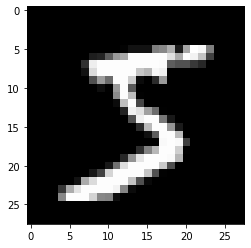

In [102]:
# save an image to work with
img = X_train[0]
print(img.shape)

show_img(img)

<p>To work with the image in the self-implemented code, we need to pad it so that the width and height of the image are can be expressed through 2^n, with n > 0 an integer.</p>
<p>The below written function just provides periodic padding for the case of the image width and height equal to 2^n - 4.</p>

In [0]:
def periodic_padding(img, pad=2):
    img_padded = np.zeros((img.shape[0] + pad * 2, img.shape[1] + pad * 2))
    if pad % 2 == 0:
        # c = int(pad / 2)
        # img_padded[c:-c, c:-c] = img
        img_padded[pad:-pad, pad:-pad] = img
    else:
        return "pad must be even"

    if img_padded.shape[0] % 8 != 0 or img_padded.shape[1] % 8 != 0:
        return "padded image dimension must be devisble by 8"

    n = img_padded.shape[0]
    m = img.shape[0] - 1

    #### only pad == 2 case ####

    # handling corners
    img_padded[0, 0] = img[m - 1, m - 1]
    img_padded[0, 1] = img[m - 1, m]
    img_padded[1, 0] = img[m, m - 1]
    img_padded[1, 1] = img[m, m]

    img_padded[0, n - pad] = img[m - 1, 0]
    img_padded[0, n - pad + 1] = img[m - 1, 1]
    img_padded[1, n - pad] = img[m, 0]
    img_padded[1, n - pad + 1] = img[m, 1]

    img_padded[n - pad, 0] = img[0, m - 1]
    img_padded[n - pad + 1, 0] = img[1, m - 1]
    img_padded[n - pad, 1] = img[0, m]
    img_padded[n - pad + 1, 1] = img[1, m]

    img_padded[n - pad, n - pad] = img[0, 0]
    img_padded[n - pad, n - pad + 1] = img[0, 1]
    img_padded[n - pad + 1, n - pad] = img[1, 0]
    img_padded[n - pad + 1, n - pad + 1] = img[1, 1]

    for i in range(pad, n - pad):
        img_padded[i, 0] = img_padded[i, n - 2*pad]
        img_padded[i, 1] = img_padded[i, n - 2*pad + 1]
        img_padded[0, i] = img_padded[n - 2*pad, i]
        img_padded[1, i] = img_padded[n - 2*pad + 1, i]
        img_padded[i, n - pad] = img_padded[i, pad + 1]
        img_padded[i, n - pad + 1] = img_padded[i, pad + 0]
        img_padded[n - pad, i] = img_padded[pad + 0, i]
        img_padded[n - pad + 1, i] = img_padded[pad + 1, i]

    return img_padded

The Numpy FFT2D took 0.0003161430358886719 ms.


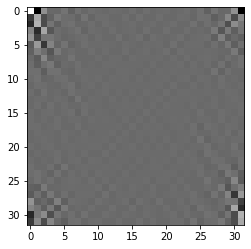

The self-implemented FFT2D took 0.07830262184143066 ms.


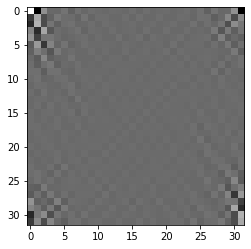

In [108]:
import time

padded_img = periodic_padding(img)
# show_img(padded_img, size=32)

# in numpy it would not be necessary to input the padded version because it could
# handle all kinds of shape
# but to compare it better we will give it the padded image
start_time = time.time()
np_fft2d_img = np.fft.fft2(padded_img)
end_time = time.time()
print("The Numpy FFT2D took " + str(end_time - start_time) + " ms.")
show_img(np.real(np_fft2d_img), size=32)

# do not forget to run the fft2d twice in the self-implemented version
start_time = time.time()
fft2d_img = np.transpose(fft2d(np.transpose(fft2d(padded_img))))
end_time = time.time()
print("The self-implemented FFT2D took " + str(end_time - start_time) + " ms.")
show_img(np.real(fft2d_img), size=32)

## Conclusion

<p>Even though the self-implemented Fourier Transform using the Cooley-Tukey algorithm is working well, we can still see that it is not even close to be optimized well for fast calculations, which is especially caused by the slow speed of the Python environment and the algorithm itself. Nowadays exist even faster algorithms than the most basic one by Cooley-Tukey.</p>